In [5]:
import pandas as pd

df = pd.read_csv('c:/data/game/appstore.csv')

In [6]:

df = df.drop(['Name', 'Average User Rating(1)', 'Description','URL', 'ID','Subtitle', 'Icon URL',
'Developer', 'Primary Genre', 'Genres'], axis=1)

In [7]:
#원핫 인코딩(연령대)
df = pd.get_dummies(df, columns=['Age Rating'], prefix='Age Rating')

#NUll값을 0으로 대체
df = df.fillna(0)

#제공언어를 개수로 변환 후, 원래 테이블값과 치환
lan_list = []

lang=df['Languages']

#제공 언어를 개수로 변환
for a in lang.values:
    b = a.split(', ')
    lan_list.append(len(b))
    
#lan_list    
#기존 df의 값을 치환
df['Languages'] = lan_list

#인앱결제의 총 가격(가격이 클수록, 컨텐츠가 다양함)
total = []
In_app=df['In-app Purchases']
contents = In_app.values.tolist()

#인앱결제 상품 개수를 더함
for i in contents:
    if i != 0:
        total.append(len(str(i).split()))
    else:
        total.append(i)

df['In-app Purchases'] = total

from datetime import datetime, timedelta
import time

#현재시간
now = datetime.now()

#데이터프레임 형식으로 형식을 편집
type(now)

#게임 출시일이 기록된 리스트
month = []
ORD=df['Original Release Date']
contents = ORD.values.tolist()

#변경할 형식
datetime_format = '%d/%m/%Y'

#리스트 내부의 인덱스(문자열)를 날짜로 변경
for date in contents:
    datetime_result = datetime.strptime(date, datetime_format)
    month.append(datetime_result)

month[:5]

from dateutil.relativedelta import relativedelta

#개월수를 입력할 리스트
month2 = []

#개월수를 계산 후, 빈 리스트에 저장
for i in month:
    delta = relativedelta(now, i) #개월수를 셀 날짜의 범위(현재, 과거)
    result = 12*delta.years + delta.months # 연*12 + 잔여개월수 = 총개월수
    month2.append(result)

#갱신된 리스트를 데이터프레임에 저장
df['Original Release Date'] = month2

from datetime import datetime, timedelta
import time

#게임 업데이트일이 기록된 리스트
# 역수 계산 120(10년)- 업데이트개월수
month = []
CVRD=df['Current Version Release Date']
contents = CVRD.values.tolist()

#변경할 형식
datetime_format = '%d/%m/%Y'

#리스트 내부의 인덱스(문자열)를 날짜로 변경
for date in contents:
    datetime_result = datetime.strptime(date, datetime_format)
    month.append(datetime_result)

from dateutil.relativedelta import relativedelta

#개월수를 입력할 리스트
month2 = []

#개월수를 계산 후, 빈 리스트에 저장
for i in month:
    delta = relativedelta(now, i) #개월수를 셀 날짜의 범위(현재, 과거)
    result = 100 - 12*delta.years + delta.months # 연*12 + 잔여개월수 = 총개월수
    month2.append(result)

#갱신된 리스트를 데이터프레임에 저장
df['Current Version Release Date'] = month2
    

In [8]:
df.head()

,Average User Rating,Result,User Rating Count,Price,In-app Purchases,Languages,Size,Original Release Date,Current Version Release Date,Age Rating_12+,Age Rating_17+,Age Rating_4+,Age Rating_9+
0,2.0,0,0.0,0.0,0,2,26074112.0,63,74,0,0,1,0
1,4.0,1,42.0,0.0,4,2,90423296.0,57,59,1,0,0,0
2,4.5,1,9146.0,0.0,9,8,198654976.0,37,81,0,0,1,0
3,4.5,1,595.0,0.0,7,11,60456960.0,54,58,0,0,0,1
4,4.5,1,1930.0,0.0,2,13,48525312.0,53,82,0,0,1,0


In [11]:
from sklearn.model_selection import train_test_split
train_cols = df.columns[2:]

X = df[train_cols]
y = df['Result']

In [12]:
train_cols

Index(['User Rating Count', 'Price', 'In-app Purchases', 'Languages', 'Size',
       'Original Release Date', 'Current Version Release Date',
       'Age Rating_12+', 'Age Rating_17+', 'Age Rating_4+', 'Age Rating_9+'],
      dtype='object')

In [13]:
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X,y)
X_samp = pd.DataFrame(data=X_sample, columns=train_cols)
y_samp = pd.DataFrame(data=y_sample, columns=['Result'])

df2 = pd.concat([X_samp, y_samp], axis=1)

In [14]:
import statsmodels.api as sm
model = sm.Logit(y,X)
result = model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.524274
         Iterations 8
                               Results: Logit
Model:                  Logit                Pseudo R-squared:     0.171     
Dependent Variable:     Result               AIC:                  17791.7283
Date:                   2022-01-26 16:38     BIC:                  17876.8446
No. Observations:       16947                Log-Likelihood:       -8884.9   
Df Model:               10                   LL-Null:              -10722.   
Df Residuals:           16936                LLR p-value:          0.0000    
Converged:              1.0000               Scale:                1.0000    
No. Iterations:         8.0000                                               
-----------------------------------------------------------------------------
                              Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------------

array([[<AxesSubplot:xlabel='Average User Rating', ylabel='Average User Rating'>,
        <AxesSubplot:xlabel='Result', ylabel='Average User Rating'>,
        <AxesSubplot:xlabel='User Rating Count', ylabel='Average User Rating'>,
        <AxesSubplot:xlabel='Price', ylabel='Average User Rating'>,
        <AxesSubplot:xlabel='In-app Purchases', ylabel='Average User Rating'>,
        <AxesSubplot:xlabel='Languages', ylabel='Average User Rating'>,
        <AxesSubplot:xlabel='Size', ylabel='Average User Rating'>,
        <AxesSubplot:xlabel='Original Release Date', ylabel='Average User Rating'>,
        <AxesSubplot:xlabel='Current Version Release Date', ylabel='Average User Rating'>,
        <AxesSubplot:xlabel='Age Rating_12+', ylabel='Average User Rating'>,
        <AxesSubplot:xlabel='Age Rating_17+', ylabel='Average User Rating'>,
        <AxesSubplot:xlabel='Age Rating_4+', ylabel='Average User Rating'>,
        <AxesSubplot:xlabel='Age Rating_9+', ylabel='Average User Rating'>],
 

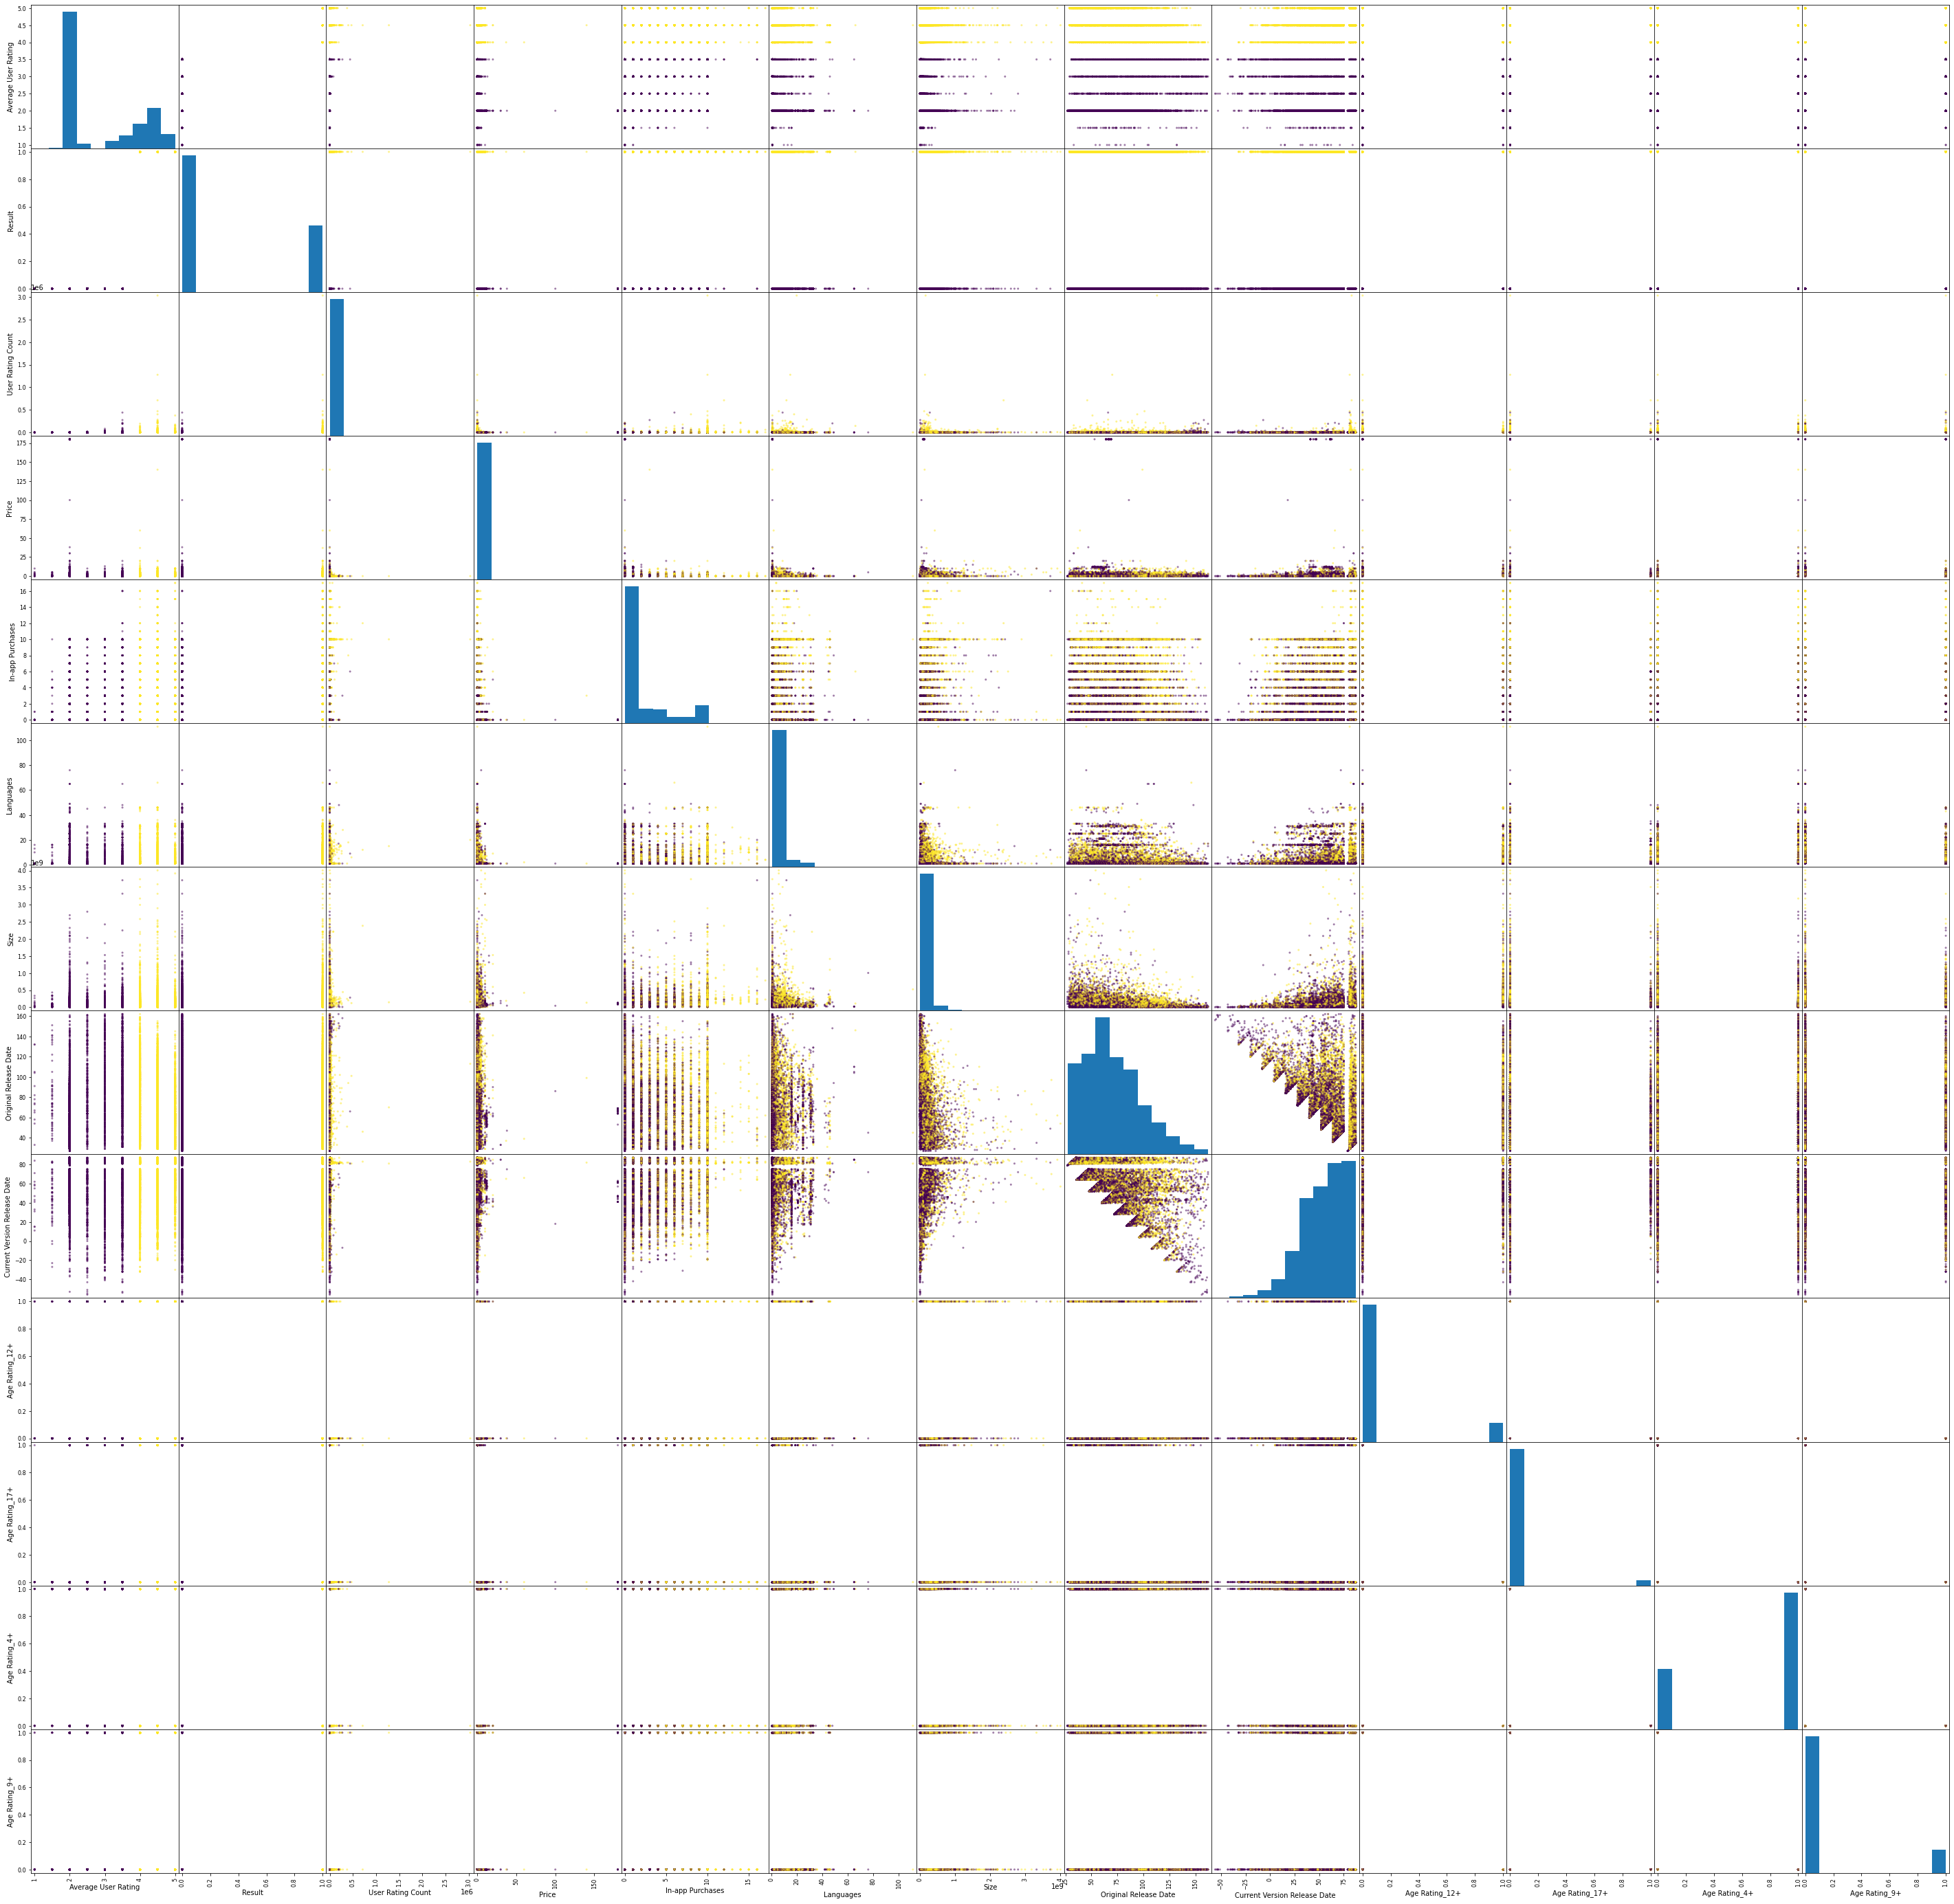

In [17]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

scatter_matrix(df,
    c=df['Result'],
    alpha=0.5,
    figsize=(50,50)
)